# Objective
by Lachcha Sukserm on 25/05/2021
- To test Twors with multiple swap positions to see 2 is better than other or not

In [3]:
def twors_mutation(individual, indpb=2, veh_num=3):
    """

    :param individual:
    :param indpb: no of swap positions
    :param veh_num: no of vehicle
    
    :return:
    """
    _individual = copy.deepcopy(individual)

    rl = random.sample(range(len(_individual[:-veh_num])), indpb)
    for i in range(0, indpb, 2):
        _individual[rl[i]], _individual[rl[i+1]] = _individual[rl[i+1]], _individual[rl[i]]

    return _individual

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('twors_mutation.xlsx',sheet_name='Sheet1') 
df = df.drop(df.columns[0],axis=1)
df = df.sort_values(['NODE_NUM'])
df

,ORDER_DATE,NODE_NUM,MUTATE_FUNC,MUTATE_SEP_FUNC,CROSS_FUNC,CROSS_SEP_FUNC,SHUFFLE_SIZE,TWORs_COUNT,MUTATE_PROB,CROSS_PROB,SEED,POPULATION,GENERATION,CONVERGE_GEN,TIME,BEST_FITNESS
27,2020-06-23,23,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,6,0.2,0.8,999,1500,500,277,0:02:42.376000,16569.43
29,2020-06-23,23,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,10,0.2,0.8,999,1500,500,230,0:02:48.109517,17593.17
28,2020-06-23,23,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,8,0.2,0.8,999,1500,500,165,0:02:41.913000,17526.77
26,2020-06-23,23,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,4,0.2,0.8,999,1500,500,166,0:02:47.340000,17769.97
25,2020-06-23,23,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,2,0.2,0.8,999,1500,500,169,0:02:47.877999,17126.11
24,2020-11-11,29,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,10,0.2,0.8,999,1500,500,208,0:03:02.576957,23132.97
23,2020-11-11,29,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,8,0.2,0.8,999,1500,500,230,0:03:06.132269,23933.15
22,2020-11-11,29,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,6,0.2,0.8,999,1500,500,336,0:03:04.604998,23075.63
21,2020-11-11,29,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,4,0.2,0.8,999,1500,500,201,0:03:10.667997,22533.06
20,2020-11-11,29,twors_mutation,twors_mutation_sep,uniform_based_order,uniform_based_order_sep,0.2,2,0.2,0.8,999,1500,500,243,0:03:15.410440,22907.93


# Convert BEST_FITNESS to categorial

Take fitness result of twors_count 4,6,8,10 to compare against fitness of twors_count 2 in each routing order to find worst or better

In [3]:
def convert_fitness(BEST_FITNESS):
    base_fitness = None
    TWORS_COUNT = []
    CONVERTED_FITNESS = []
    for i in range(len(BEST_FITNESS)):
        j = i%5
        if j==0:
            base_fitness = BEST_FITNESS[i]
        else:
            TWORS_COUNT.append((j+1)*2)
            if BEST_FITNESS[i] < base_fitness:
                CONVERTED_FITNESS.append('BETTER')
            else:
                CONVERTED_FITNESS.append('WORSE')
    temp = {'TWORS_COUNT': TWORS_COUNT, 'CONVERTED_FITNESS': CONVERTED_FITNESS}
    return pd.DataFrame.from_dict(temp)

In [4]:
df2 = convert_fitness(df['BEST_FITNESS'].to_numpy()).groupby(by=['TWORS_COUNT','CONVERTED_FITNESS']).size()
df2

TWORS_COUNT  CONVERTED_FITNESS
4            BETTER               6
             WORSE                5
6            BETTER               9
             WORSE                2
8            BETTER               7
             WORSE                4
10           BETTER               6
             WORSE                5
dtype: int64

# Convert to numpy table

In [5]:
twors_count = len(df['TWORs_COUNT'].unique())-1
table = df2.to_numpy().reshape([twors_count,-1])
table

array([[6, 5],
       [9, 2],
       [7, 4],
       [6, 5]], dtype=int64)

In [6]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [7]:
chi2_stat, p, dof, expected = chi2_contingency(table)
print(f'degree of freedom = {dof}')
print('=========================================')
print(expected)


# test by chi2_stat
print("test-statistic")
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, chi2_stat=%.3f' % (prob, critical, chi2_stat))
if abs(chi2_stat) >= critical:
    print(f'Dependent (reject H0) at {prob*100}% probability')
else:
    print(f'Independent (fail to reject H0) at {prob*100}% probability')
print('=========================================')


# test by p-value
print("p-value")
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print(f'Dependent (reject H0) at {prob*100}% probability')
else:
    print(f'Independent (fail to reject H0) at {prob*100}% probability')

degree of freedom = 3
[[7. 4.]
 [7. 4.]
 [7. 4.]
 [7. 4.]]
test-statistic
probability=0.950, critical=7.815, chi2_stat=2.357
Independent (fail to reject H0) at 95.0% probability
p-value
significance=0.050, p=0.502
Independent (fail to reject H0) at 95.0% probability


<B>Conclude</B>: TWORS_COUNT has no correletion with BEST_FITNESS value <br>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
fits = np.array([df[df['ORDER_DATE']==date]['BEST_FITNESS'].to_numpy() for date in df['ORDER_DATE'].unique()])
fits

array([[   16569.43,    17593.17,    17526.77,    17769.97,    17126.11],
       [   23132.97,    23933.15,    23075.63,    22533.06,    22907.93],
       [   27627.78,    26530.78,    25890.85,    26644.06,    27425.29],
       [   26842.47,    24333.41,    25424.1 ,    25717.88,    26258.59],
       [   31844.91,    33012.34,    33651.51,    37742.95,    32893.73],
       [ 2121818.5 ,   473851.55,   914609.14,  2246474.11,   894553.77],
       [  801938.51,  1400481.21,   528324.07,   283595.31,   840950.85],
       [  998643.76,  1291878.21,   857895.13,   613441.91,  1344647.89],
       [ 3193404.78,  2542044.57,  1924692.54,  1754050.09,  2533508.38],
       [ 6982905.55,  5216899.86,  5948096.78,  5484209.42,  5610148.47],
       [13961061.65, 11768703.45, 12631854.62, 14128661.29, 14112023.95]])

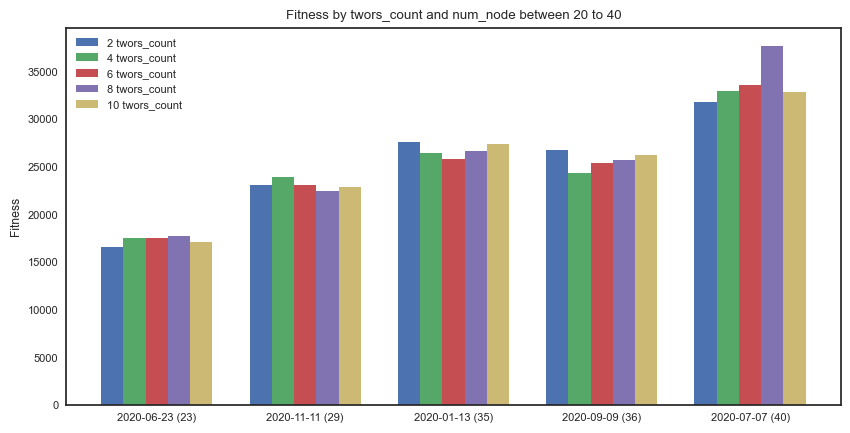

In [17]:

figure(figsize=(10, 5), dpi=100)
plt.style.use('seaborn-deep')

N = len(fits[0:5])

ind = np.arange(N) 
width = 0.15
for i in range(N):
    plt.bar(ind+i*width, fits[0:5,i], width,label=f'{(i+1)*2} twors_count')

plt.ylabel('Fitness')
plt.title('Fitness by twors_count and num_node between 20 to 40')
lebel = []
for date in df['ORDER_DATE'].unique()[0:5]:
    num_node = df[df['ORDER_DATE']==date]['NODE_NUM'].unique()[0]
    lebel.append(f'{date} ({num_node})')


plt.xticks(ind + width*2, lebel)
plt.legend(loc='best')
plt.show()

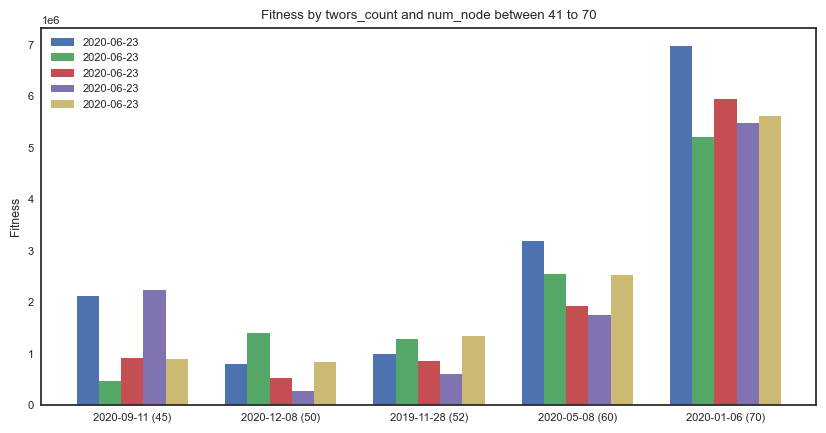

In [18]:

figure(figsize=(10, 5), dpi=100)

N = len(fits[5:10])

ind = np.arange(N) 
width = 0.15
for i in range(N):
    plt.bar(ind+i*width, fits[5:10,i], width,label=df.iloc[i,0])

plt.ylabel('Fitness')
plt.title('Fitness by twors_count and num_node between 41 to 70')
lebel = []
for date in df['ORDER_DATE'].unique()[5:10]:
    num_node = df[df['ORDER_DATE']==date]['NODE_NUM'].unique()[0]
    lebel.append(f'{date} ({num_node})')



plt.xticks(ind + width*2, lebel)
plt.legend(loc='best')
plt.show()